In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv("final_home_price_data.csv")
df.tail()

,observation_date,CSUSHPISA,Year,Month,per_cap_gpd,Cons_material_index,Consumer_price_index,emp_rate,unemp_rate,fed_eff_r,new_pvt_units,workin_pop,housing_subs,total_housholds,med_house_inocome
235,2023-08-01,309.040,2023,8,67618.666667,333.794,306.138,72.09169,3.7,5.33,1305,208840100,53.573,131434.0,80610.0
236,2023-09-01,311.177,2023,9,67738.333333,332.098,307.374,72.03111,3.8,5.33,1363,209000200,53.573,131434.0,80610.0
237,2023-10-01,313.259,2023,10,67858.000000,328.743,307.653,72.00032,3.9,5.33,1365,209038200,53.573,131434.0,80610.0
238,2023-11-01,314.243,2023,11,67899.000000,326.844,308.087,72.14789,3.7,5.33,1510,209095300,53.573,131434.0,80610.0
239,2023-12-01,314.990,2023,12,67940.000000,327.644,308.735,71.79310,3.8,5.33,1568,209200000,53.573,131434.0,80610.0


In [3]:
df.drop(columns=["observation_date","Year","Month"], inplace=True)

In [4]:
df.shape

(240, 12)

In [5]:
df_stats = df.describe()
df_stats

,CSUSHPISA,per_cap_gpd,Cons_material_index,Consumer_price_index,emp_rate,unemp_rate,fed_eff_r,new_pvt_units,workin_pop,housing_subs,total_housholds,med_house_inocome
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02,240.000000,240.000000,240.00000
mean,189.246050,58234.754167,222.085254,236.059096,69.535071,5.893750,1.496458,1226.916667,2.012369e+08,36.059600,122352.250000,72153.50000
std,47.990141,4351.213290,48.930616,29.873271,2.090655,2.101186,1.775589,440.437631,5.635969e+06,6.945818,6031.820665,5089.10949
min,136.526000,52179.000000,150.000000,186.300000,60.168550,3.400000,0.050000,478.000000,1.875664e+08,27.201000,112000.000000,65740.00000
25%,152.793250,54790.916667,190.075000,214.774000,67.701688,4.400000,0.120000,916.500000,1.972468e+08,31.970750,117081.500000,68242.50000
50%,176.937000,56547.833333,210.800000,234.733000,70.046335,5.100000,0.400000,1205.500000,2.027028e+08,34.018000,122844.000000,70540.00000
75%,206.242500,61619.250000,234.450000,252.768250,71.361870,7.350000,2.382500,1520.750000,2.057472e+08,39.190500,127802.250000,76227.50000
max,314.990000,67940.000000,353.015000,308.735000,72.314130,14.800000,5.330000,2273.000000,2.092000e+08,53.573000,131434.000000,81210.00000


In [6]:
cor_mat = df.corr()
cor_mat

,CSUSHPISA,per_cap_gpd,Cons_material_index,Consumer_price_index,emp_rate,unemp_rate,fed_eff_r,new_pvt_units,workin_pop,housing_subs,total_housholds,med_house_inocome
CSUSHPISA,1.000000,0.920804,0.913514,0.850616,0.439755,-0.559527,0.354853,0.433804,0.584856,0.874465,0.734490,0.853722
per_cap_gpd,0.920804,1.000000,0.926465,0.948621,0.290832,-0.544394,0.138251,0.253333,0.816939,0.931992,0.918751,0.890267
Cons_material_index,0.913514,0.926465,1.000000,0.953812,0.164975,-0.366618,0.049394,0.126194,0.758103,0.941286,0.852938,0.734529
Consumer_price_index,0.850616,0.948621,0.953812,1.000000,0.062089,-0.329806,-0.016515,0.003625,0.897134,0.972837,0.951911,0.770468
emp_rate,0.439755,0.290832,0.164975,0.062089,1.000000,-0.893626,0.753987,0.685663,-0.170689,0.058261,-0.024425,0.383458
unemp_rate,-0.559527,-0.544394,-0.366618,-0.329806,-0.893626,1.000000,-0.555167,-0.627976,-0.193183,-0.275246,-0.321635,-0.547170
fed_eff_r,0.354853,0.138251,0.049394,-0.016515,0.753987,-0.555167,1.000000,0.503370,-0.248556,0.012735,-0.164562,0.245978
new_pvt_units,0.433804,0.253333,0.126194,0.003625,0.685663,-0.627976,0.503370,1.000000,-0.257841,0.064902,-0.038666,0.394836
workin_pop,0.584856,0.816939,0.758103,0.897134,-0.170689,-0.193183,-0.248556,-0.257841,1.000000,0.832291,0.965018,0.649858
housing_subs,0.874465,0.931992,0.941286,0.972837,0.058261,-0.275246,0.012735,0.064902,0.832291,1.000000,0.911624,0.811489


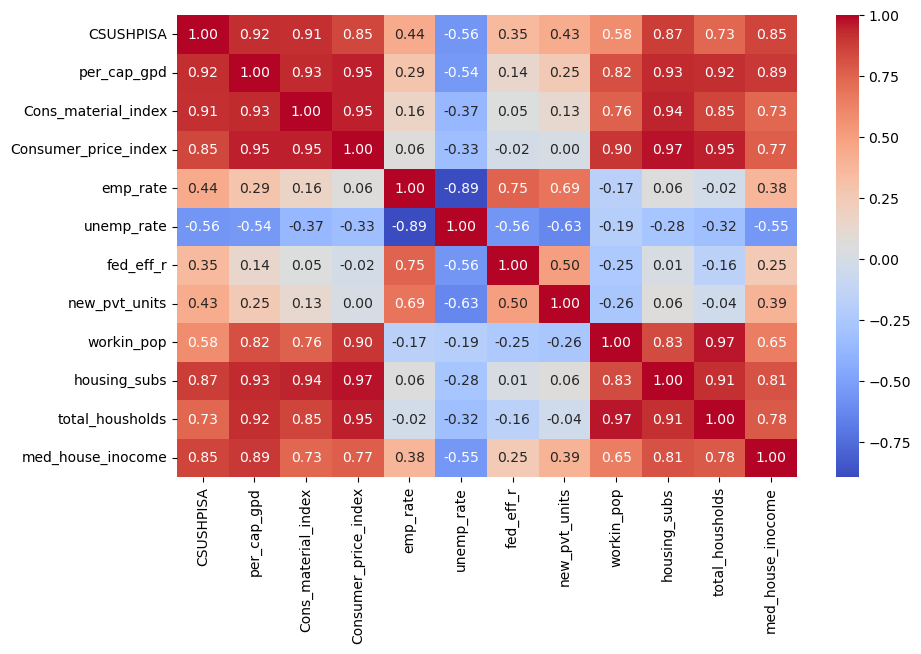

In [7]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
features = ['per_cap_gpd', 'Cons_material_index',
       'Consumer_price_index', 'emp_rate', 'unemp_rate', 'fed_eff_r',
       'new_pvt_units', 'workin_pop', 'housing_subs', 'total_housholds',
       'med_house_inocome']
target = ["CSUSHPISA"]

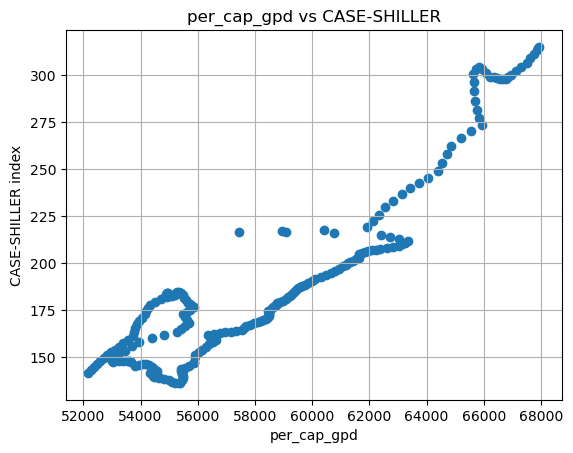

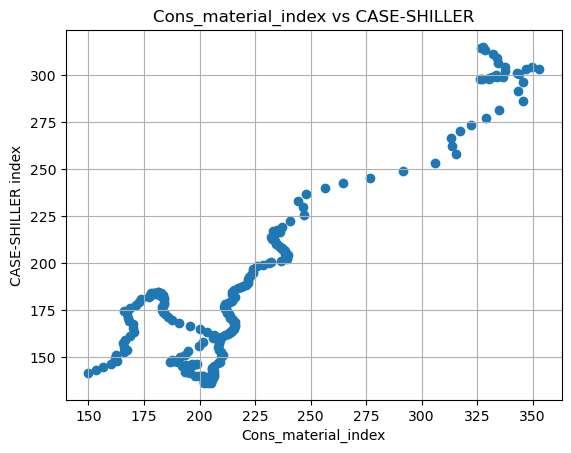

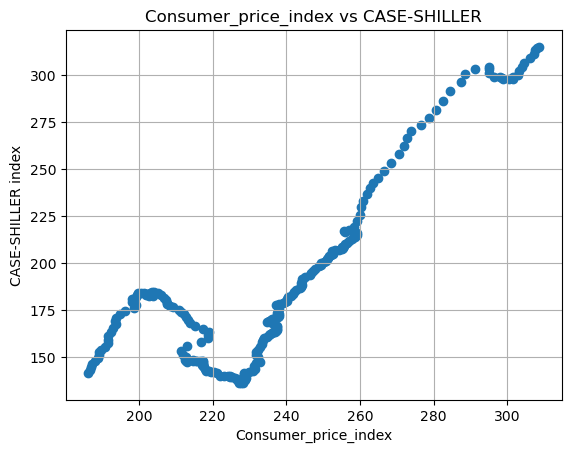

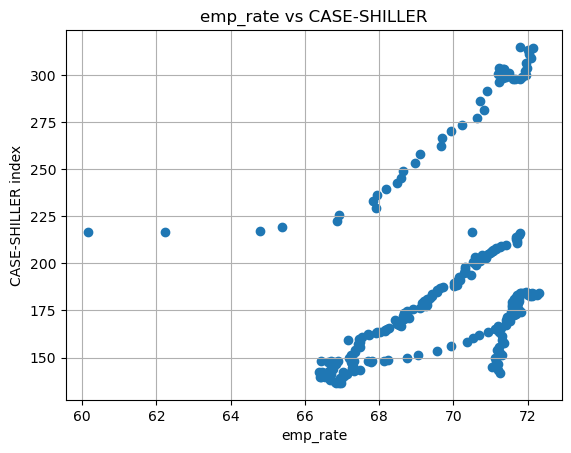

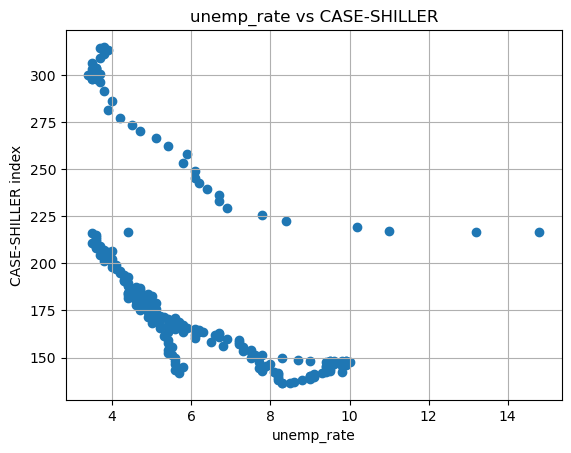

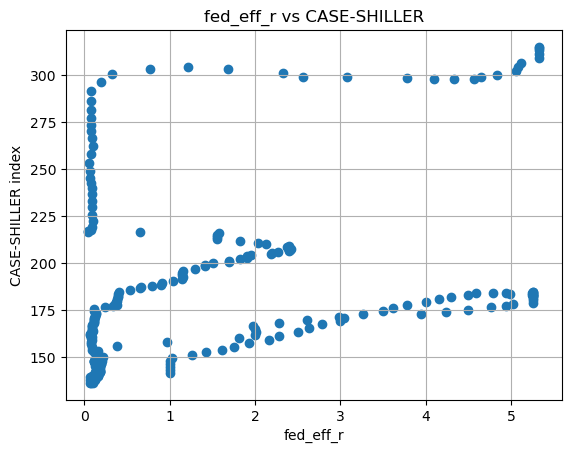

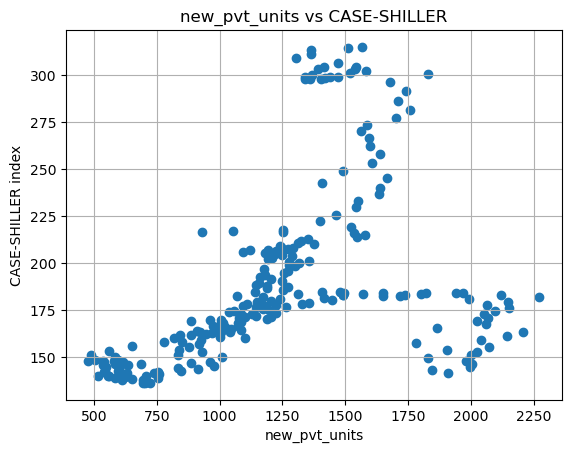

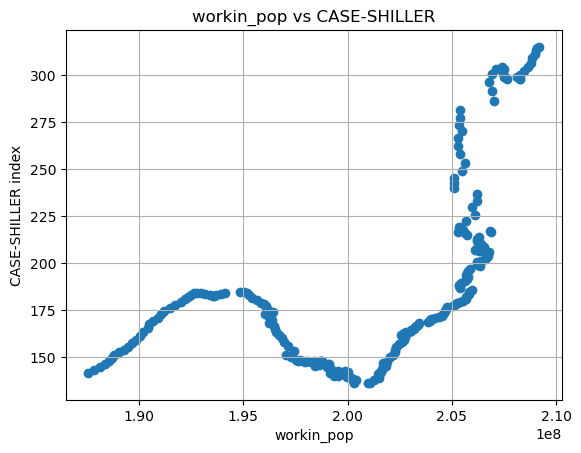

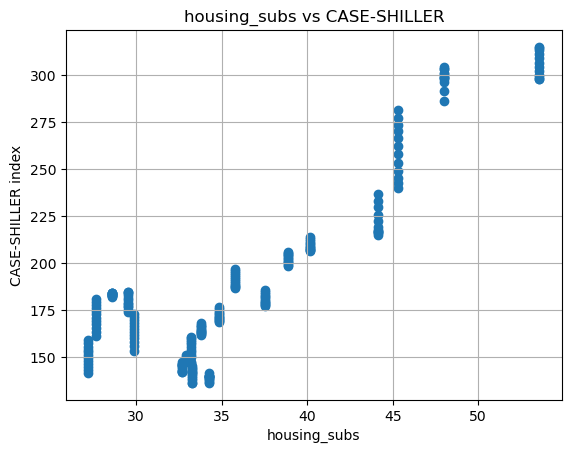

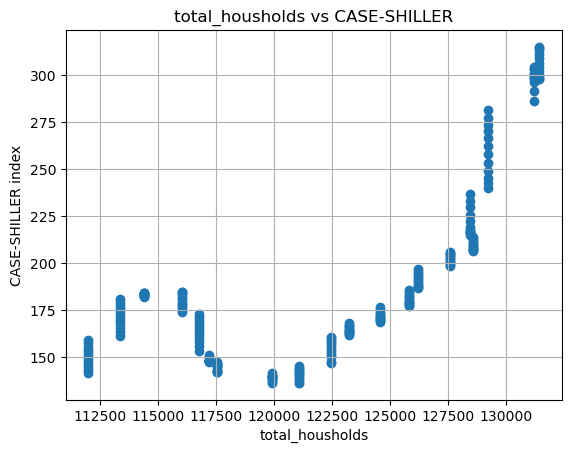

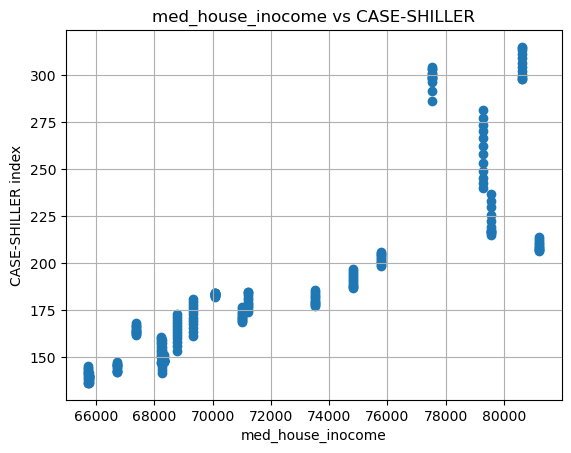

In [9]:
#sccatter plot :  CASE-SHILLER index vs features
for feature in features:
    plt.figure()
    plt.scatter(x=df[feature], y=df[target])
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"{feature} vs CASE-SHILLER")
    plt.grid(True)
    plt.show()


In [10]:
correlation = df[features].apply(lambda column: np.abs(column.corr(df[target].squeeze())))

# Sort correlations in ascending order
sorted_correlations = correlation.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
fed_eff_r               0.354853
new_pvt_units           0.433804
emp_rate                0.439755
unemp_rate              0.559527
workin_pop              0.584856
total_housholds         0.734490
Consumer_price_index    0.850616
med_house_inocome       0.853722
housing_subs            0.874465
Cons_material_index     0.913514
per_cap_gpd             0.920804
dtype: float64


**TIME SERIES ANALYSIS**

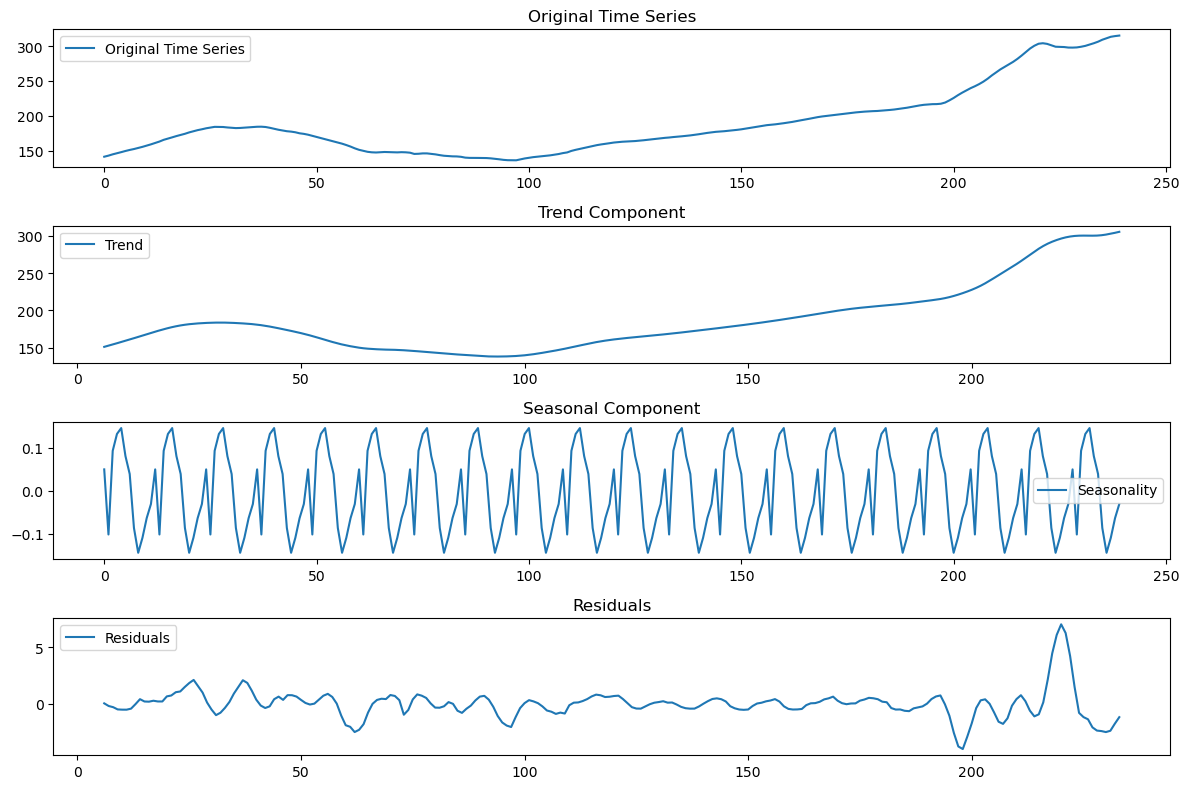

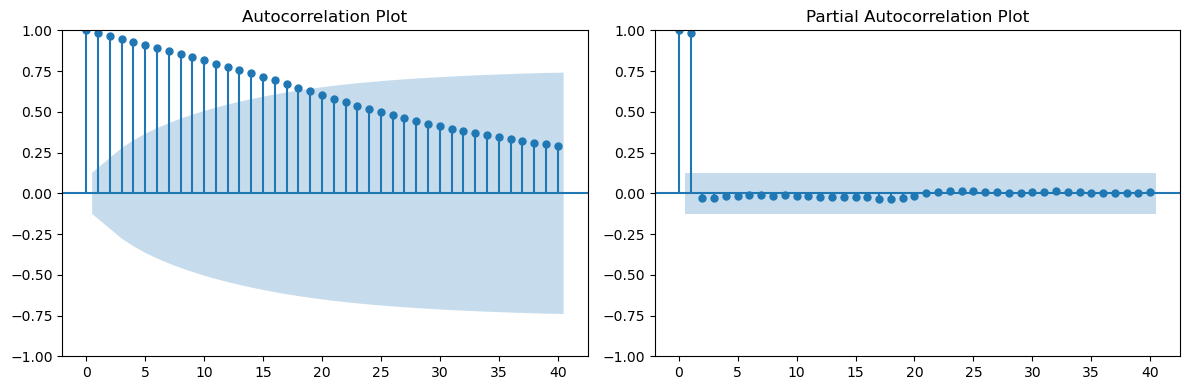

In [13]:
# Time Series Decomposition
decomposition = seasonal_decompose(df[target], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df[target], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(df[target], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(df[target], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()
